In [20]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kendalltau

In [21]:
# Load data from the Excel file
df = pd.read_excel('Thesis_V6.xlsx')


In [22]:
# Removing any rows with NaN values
df.dropna(inplace=True) 


In [5]:
# Visualizing the first 10 rows with column head
df.head(10) 

,FID,Lat,Long,GR (Recharge),Precipitation,ET_pot,Prec_seasonality,Temp_seasonality,Aridity,DEM,...,Landuse,Rock type,Recharge fraction,a,alpha,b,beta,scale,Location,Duration(24hrs)
0,0,37.3,-80.1,27.0,998,1213,11,7894,1.135838,373,...,14,13,0.027054,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
1,1,46.3,-119.9,119.0,191,1118,43,7596,5.994595,278,...,12,14,0.623037,10.216609,-0.569130,10.270910,-0.725667,0.948149,0.979379,0.120018
7,7,37.4,116.3,84.6,534,1089,114,10329,1.981785,55,...,12,14,0.158427,13.270794,-0.621530,5.259001,-0.599323,0.978923,0.975101,0.085029
8,8,-12.0,135.6,252.7,1395,1608,110,1582,1.095173,1,...,8,14,0.181147,15.554260,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
9,9,-12.0,135.6,444.7,1395,1608,110,1582,1.095173,1,...,8,14,0.318781,15.554260,-0.619861,5.818436,-0.599514,0.949102,0.987621,0.129363
10,10,-12.1,135.6,257.0,1369,1618,110,1645,1.155381,1,...,12,14,0.187728,12.528232,-0.421433,7.977501,-0.553530,0.956483,0.990743,0.074722
12,12,-12.1,134.9,102.8,1171,1627,108,1771,1.373626,1,...,8,15,0.087788,12.528232,-0.421433,7.977501,-0.553530,0.956483,0.990743,0.074722
13,13,-12.1,135.7,411.3,1386,1608,109,1661,1.137394,2,...,8,14,0.296753,14.656710,-0.538391,8.739699,-0.623872,0.959272,0.996218,0.106877
14,14,-12.1,134.9,12.1,1171,1627,108,1771,1.373626,1,...,8,15,0.010333,13.092541,-0.428984,8.639123,-0.540518,0.954135,0.989952,0.082493
15,15,-12.1,134.2,427.8,1244,1668,111,1830,1.297424,1,...,8,14,0.343891,11.585058,-0.414840,5.940464,-0.510349,0.953509,0.988129,0.085139


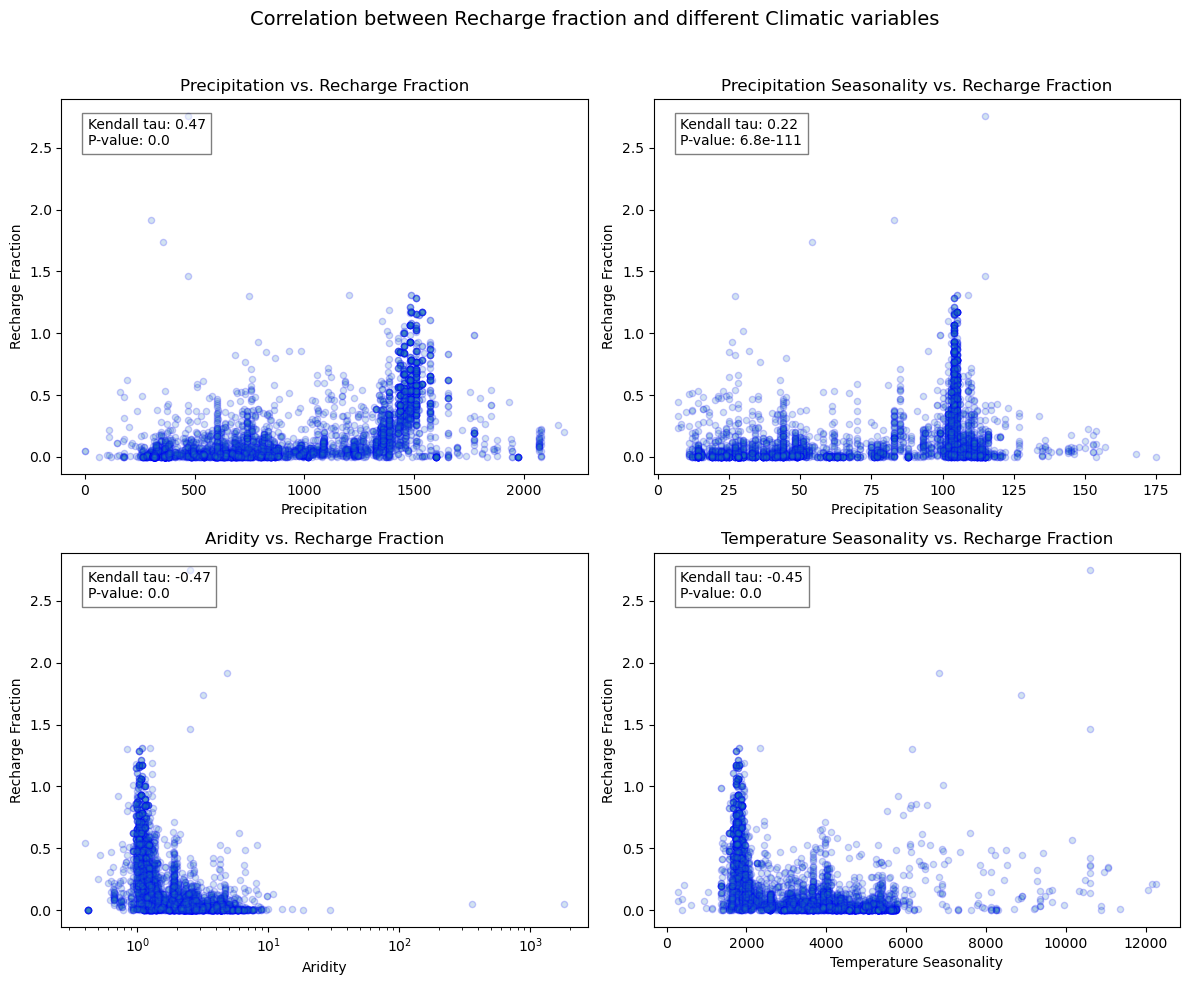

In [19]:
# Extract  theb values from the columns

recharge_fraction = df['Recharge fraction']

precipitation = df['Precipitation']
Precipitation_seasonality = df['Prec_seasonality']
Temp_seasonality = df['Temp_seasonality']
Aridity = df['Aridity']

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Correlation between Recharge fraction and different Climatic variables", fontsize=14)

# Define plot data and labels
plot_data = [
    (precipitation, recharge_fraction, 'Precipitation', axes[0, 0]),
    (Precipitation_seasonality, recharge_fraction, 'Precipitation Seasonality', axes[0, 1]),
    (Aridity, recharge_fraction, 'Aridity', axes[1, 0]),
    (Temp_seasonality, recharge_fraction, 'Temperature Seasonality', axes[1, 1])
]

# Loop through data and create scatter plots
for x_data, y_data, xlabel, ax in plot_data:
    tau, p_value_kendall = kendalltau(x_data, y_data)
    ax.scatter(x_data, y_data, marker='o', s=20, alpha=0.2, edgecolors='b')
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Recharge Fraction')
    ax.set_title(f'{xlabel} vs. Recharge Fraction')
    
    # Log scale for Aridity
    if xlabel == 'Aridity':
        ax.set_xscale('log')
    
    # Annotate Kendall's tau and p-value
    textstr = f"Kendall tau: {tau:.2f}\nP-value: {p_value_kendall:.2}"
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', 
            bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show plot
plt.show()


### From the picture avobe, it can be said that recahrge fraction has strong to moderate correlation with climatic variavles such as, precipiatation, temperature seasonality and aridity. 

# Implementing different models

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.317
Method:                 Least Squares   F-statistic:                     2176.
Date:                Mon, 17 Feb 2025   Prob (F-statistic):               0.00
Time:                        23:40:35   Log-Likelihood:                 598.76
No. Observations:                4686   AIC:                            -1194.
Df Residuals:                    4684   BIC:                            -1181.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1323      0.007    -17.651      0.0

/var/folders/79/63bnf85s5bqggmz2_tltf7_m0000gn/T/ipykernel_17827/573047208.py:13: RuntimeWarning: overflow encountered in exp
  return A / (1 + np.exp(-B * (x_data - C)))


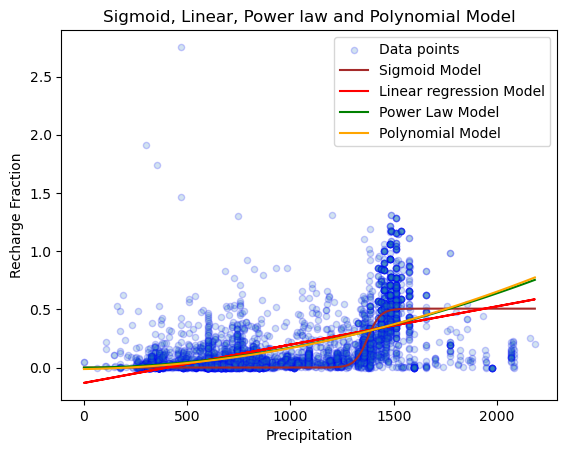

Sigmoid Model R²: 0.4370
Sigmoid Model P-value: 0.0000e+00
Linear Model R²: 0.3172029255658432
Linear Model P-values: [1.46591681e-67 0.00000000e+00]
Power Law Model R²: 0.3288339927149674
Power Law Model P-value: 0.0
Polynomial Model R²: 0.32835706256513764
Polynomial Model P-value: 1.1102230246251565e-16


In [35]:
# Importing requirer libraries for implementing different models
from sklearn.linear_model import LinearRegression
import pwlf
import scipy.optimize as opt
import statsmodels.api as sm
from scipy import stats
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


# Sigmoid function for implementing sigmoid model
def sigmoid(x_data, A, B, C):
    return A / (1 + np.exp(-B * (x_data - C)))

# Replace NaN values with the mean value for each column
df['Precipitation'] = df['Precipitation'].fillna(df['Precipitation'].mean())
df['Recharge fraction'] = df['Recharge fraction'].fillna(df['Recharge fraction'].mean())

# Extract variables
x_data = df['Precipitation'].values
y_data = df['Recharge fraction'].values

# Initial guess for parameters
initial_params = [max(y_data), 1, np.median(x_data)]

#Increase the maximum number of function evaluations by setting the maxfev parameter in the curve_fit function
params, covariance = opt.curve_fit(sigmoid, x_data, y_data, p0=initial_params, maxfev=10000)
A_opt, B_opt, C_opt = params

# Compute R-squared
y_pred = sigmoid(x_data, A_opt, B_opt, C_opt)
ss_res = np.sum((y_data - y_pred) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)
R_squared = 1 - (ss_res / ss_tot)

# Compute P-value using Pearson correlation
t_stat, p_value = stats.pearsonr(y_data, y_pred)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(x_data.reshape(-1, 1), y_data)
y_pred_linear = linear_model.predict(x_data.reshape(-1, 1))
linear_model_r2 = linear_model.score(x_data.reshape(-1, 1), y_data)

# Using statsmodels to get p-values and additional stats for linear regression
x_data2 = sm.add_constant(x_data)
est = sm.OLS(y_data, x_data2)
est2 = est.fit()
print(est2.summary())

# Store linear model p-values
linear_p_values = est2.pvalues

# Power Law Model
def power_law(x_data, a, b):
    return a * np.power(x_data, b)

params, _ = curve_fit(power_law, x_data, y_data)
a, b = params
x_data_hat = np.linspace(min(x_data), max(x_data), 100)

y_data_hat_powerlaw = power_law(x_data_hat, a, b)
y_data_hat_powerlaw_full = power_law(x_data, a, b)

# R-squared for power law model
ss_res_powerlaw = np.sum((y_data - y_data_hat_powerlaw_full) ** 2)
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)

powerlaw_model_r2 = 1 - (ss_res_powerlaw / ss_tot)

# Compute p-values for power law model using residuals
_, powerlaw_p_value = stats.pearsonr(y_data, y_data_hat_powerlaw_full)


# Polynomial Model
degree = 2  # Set the degree of the polynomial
coeffs = np.polyfit(x_data, y_data, degree)
poly_model = np.poly1d(coeffs)
y_data_hat_poly = poly_model(x_data_hat)

# R-squared for polynomial model
y_data_hat_poly_full = poly_model(x_data)
ss_res_poly = np.sum((y_data - y_data_hat_poly_full) ** 2)
poly_model_r2 = 1 - (ss_res_poly / ss_tot)


# Estimate p-value for polynomial model with an F-test
k_poly = degree + 1  # Number of parameters (coefficients)

n = len(y_data)  # Number of observations

f_statistic_poly = ((ss_tot - ss_res_poly) / k_poly) / (ss_res_poly / (n - k_poly - 1))
poly_p_value = 1 - stats.f.cdf(f_statistic_poly, k_poly, n - k_poly - 1)


# Plot results
#plt.scatter(x_data, y_data, label='Data', color='blue')

# Plot the scatter plot
bubble_sizes = 20
plt.scatter(x_data, y_data, label='Data points', marker='o', s=bubble_sizes, alpha=0.2, edgecolors='b')

plt.plot(np.sort(x_data), sigmoid(np.sort(x_data), A_opt, B_opt, C_opt), label='Sigmoid Model', color='brown')
plt.plot(x_data, y_pred_linear, color='red', label='Linear regression Model')

plt.plot(x_data_hat, y_data_hat_powerlaw, color='green', label='Power Law Model')
plt.plot(x_data_hat, y_data_hat_poly, color='orange', label='Polynomial Model')


plt.xlabel('Precipitation')
plt.ylabel('Recharge Fraction')
plt.title('Sigmoid, Linear, Power law and Polynomial Model')
plt.legend()
plt.show()

# Print results
#print(f'Optimal Parameters: A = {A_opt:.4f}, B = {B_opt:.4f}, C = {C_opt:.4f}')
print(f'Sigmoid Model R²: {R_squared:.4f}')
print(f'Sigmoid Model P-value: {p_value:.4e}')

 
print(f'Linear Model R²: {linear_model_r2}')
print(f'Linear Model P-values: {linear_p_values}')

print(f'Power Law Model R²: {powerlaw_model_r2}')
print(f'Power Law Model P-value: {powerlaw_p_value}')


print(f'Polynomial Model R²: {poly_model_r2}')
print(f'Polynomial Model P-value: {poly_p_value}')


